In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#### Plotting Below Average Shapley Values 

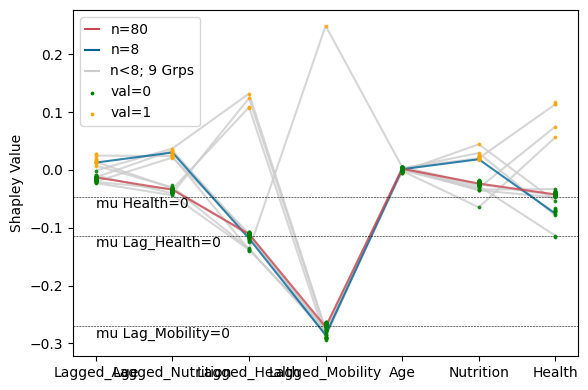

In [3]:
df = pd.read_csv(os.path.join("..","results", "CausalShapleys", "combined_df_for_below_average.csv"))
df.drop(["Unnamed: 0", "none_Shapley"], axis=1, inplace=True)

df = df.loc[:100]

df.head() 
columns = df.columns

shapleys = df[[col for col in columns if "Shapley" in col]]
values = df[[col for col in columns if "Value" in col]]

shapleys.columns = [col.replace("_Shapley", "") for col in shapleys.columns]
values.columns = [col.replace("_Value", "") for col in values.columns]

# Grouping patients based on their values
groups = values.groupby(values.columns.tolist()).groups.values()

fig, ax = plt.subplots(figsize=(6,4))

zero_mobility_ids = values.loc[values['Lagged_Mobility'] == 0].index
zero_lagged_health_ids = values.loc[values['Lagged_Health'] == 0].index
zero_health_ids = values.loc[values['Health'] == 0].index

# Compute the mean Shapley values for the corresponding IDs
mean_shapley_mobility = shapleys["Lagged_Mobility"].loc[zero_mobility_ids].mean()
mean_shapley_lagged_health = shapleys["Lagged_Health"].loc[zero_lagged_health_ids].mean()
mean_shapley_health = shapleys["Health"].loc[zero_health_ids].mean()

plt.axhline(mean_shapley_mobility, color='black', linestyle='--', linewidth=0.4)
plt.text(0, mean_shapley_mobility, 'mu Lag_Mobility=0', color='black', fontsize=10, va='top')

plt.axhline(mean_shapley_lagged_health, color='black', linestyle='--', linewidth=0.4)
plt.text(0, mean_shapley_lagged_health, 'mu Lag_Health=0', color='black', fontsize=10, va='top')

plt.axhline(mean_shapley_health, color='black', linestyle='--', linewidth=0.4)
plt.text(0, mean_shapley_health, 'mu Health=0', color='black', fontsize=10, va='top')

# Determine the number of unique groups
num_groups = len(groups)

# Define a list of colors
colors = [ "#cb4751", "#006699", "#cb4751", "#006699"]

# Convert groups to tuples
tuple_groups = [tuple(group) for group in groups]

# Sort tuple_groups
sorted_tuple_groups = sorted(tuple_groups, key=lambda group: len(group))

# Create a mapping from group to color
group_to_color = {group: colors[i % (len(colors) - 1) + 1] for i, group in enumerate(sorted_tuple_groups)}

# Plotting groups of patients
for group in sorted_tuple_groups:
    group_shapleys = shapleys.loc[group[0]]
    group_values = values.loc[group[0]]

    # Assign a color based on group count
    if len(group) < 8:
        color = "#cccccc"  # Use grey color for smaller groups
    else:
        color = group_to_color[group]  # Use the assigned color for the group
    plt.plot(group_shapleys, color=color, alpha=0.8, zorder=1)

    for patient in group:
        patient_shapleys = shapleys.loc[patient]
        patient_values = values.loc[patient]

        for feature_idx in range(len(patient_shapleys)):
            color = 'orange' if patient_values[feature_idx] else 'g'
            plt.scatter(feature_idx, patient_shapleys[feature_idx], color=color, s=3, zorder=2, alpha=0.8)

# Setting the x-axis ticks and labels
ax.set_xticks(range(len(shapleys.columns)))
ax.set_xticklabels(shapleys.columns)

# Adding a legend with group counts and colors (for groups with count > 7)
group_counts = [len(group) for group in tuple_groups]
filtered_groups = [group for group, count in zip(tuple_groups, group_counts) if count > 7]
filtered_counts = [count for count in group_counts if count > 7]
sorted_indices = sorted(range(len(filtered_counts)), key=lambda k: filtered_counts[k], reverse=True)
sorted_counts = [filtered_counts[i] for i in sorted_indices]
sorted_handles = [Line2D([0], [0], color=group_to_color[group], linestyle='-') for group in filtered_groups]
sorted_labels = [f'n={count}' for i, count in enumerate(sorted_counts)]

small_groups_count = sum(1 for count in group_counts if count < 8)
sorted_labels += [ f'n<8; {small_groups_count} Grps', 'val=0', 'val=1']

sorted_handles.append(Line2D([0], [0], color='#cccccc', linestyle='-'))
sorted_handles.append(plt.scatter([], [], color='green', s=3))
sorted_handles.append(plt.scatter([], [], color='orange', s=3))

plt.ylabel('Shapley Value')
plt.legend(sorted_handles, sorted_labels + [''], loc='best', handlelength=1, fontsize=10)
plt.tight_layout()
plt.savefig('shapley_below_average.svg')
plt.show()

#### Plotting Above Average Shapley Values 

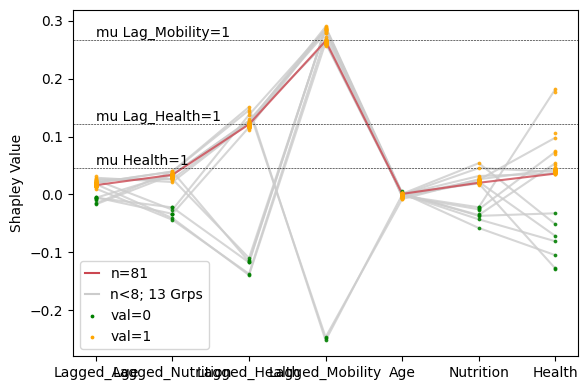

In [5]:
df = pd.read_csv(os.path.join("..","results", "CausalShapleys", "combined_df_for_above_average.csv"))
df.drop(["Unnamed: 0", "none_Shapley"], axis=1, inplace=True)

df = df.loc[:100]

df.head() 
columns = df.columns

shapleys = df[[col for col in columns if "Shapley" in col]]
values = df[[col for col in columns if "Value" in col]]

shapleys.columns = [col.replace("_Shapley", "") for col in shapleys.columns]
values.columns = [col.replace("_Value", "") for col in values.columns]

# Grouping patients based on their values
groups = values.groupby(values.columns.tolist()).groups.values()

fig, ax = plt.subplots(figsize=(6,4))

zero_mobility_ids = values.loc[values['Lagged_Mobility'] == 1].index
zero_lagged_health_ids = values.loc[values['Lagged_Health'] == 1].index
zero_health_ids = values.loc[values['Health'] == 1].index

# Compute the mean Shapley values for the corresponding IDs
mean_shapley_mobility = shapleys["Lagged_Mobility"].loc[zero_mobility_ids].mean()
mean_shapley_lagged_health = shapleys["Lagged_Health"].loc[zero_lagged_health_ids].mean()
mean_shapley_health = shapleys["Health"].loc[zero_health_ids].mean()

plt.axhline(mean_shapley_mobility, color='black', linestyle='--', linewidth=0.4)
plt.text(0, mean_shapley_mobility, 'mu Lag_Mobility=1', color='black', fontsize=10, va='bottom')

plt.axhline(mean_shapley_lagged_health, color='black', linestyle='--', linewidth=0.4)
plt.text(0, mean_shapley_lagged_health, 'mu Lag_Health=1', color='black', fontsize=10, va='bottom')

plt.axhline(mean_shapley_health, color='black', linestyle='--', linewidth=0.4)
plt.text(0, mean_shapley_health, 'mu Health=1', color='black', fontsize=10, va='bottom')

# Determine the number of unique groups
num_groups = len(groups)

# Define a list of colors
colors = [ "#cb4751", "#006699", "#cb4751", "#006699"]

# Convert groups to tuples
tuple_groups = [tuple(group) for group in groups]

# Sort tuple_groups
sorted_tuple_groups = sorted(tuple_groups, key=lambda group: len(group))

# Create a mapping from group to color
group_to_color = {group: colors[i % (len(colors) - 1) + 1] for i, group in enumerate(sorted_tuple_groups)}

# Plotting groups of patients
for group in sorted_tuple_groups:
    group_shapleys = shapleys.loc[group[0]]
    group_values = values.loc[group[0]]

    # Assign a color based on group count
    if len(group) < 8:
        color = "#cccccc"  # Use grey color for smaller groups
    else:
        color = group_to_color[group]  # Use the assigned color for the group
    plt.plot(group_shapleys, color=color, alpha=0.8, zorder=1)

    for patient in group:
        patient_shapleys = shapleys.loc[patient]
        patient_values = values.loc[patient]

        for feature_idx in range(len(patient_shapleys)):
            color = 'orange' if patient_values[feature_idx] else 'g'
            plt.scatter(feature_idx, patient_shapleys[feature_idx], color=color, s=3, zorder=2, alpha=0.8)

# Setting the x-axis ticks and labels
ax.set_xticks(range(len(shapleys.columns)))
ax.set_xticklabels(shapleys.columns)

# Adding a legend with group counts and colors (for groups with count > 7)
group_counts = [len(group) for group in tuple_groups]
filtered_groups = [group for group, count in zip(tuple_groups, group_counts) if count > 7]
filtered_counts = [count for count in group_counts if count > 7]
sorted_indices = sorted(range(len(filtered_counts)), key=lambda k: filtered_counts[k], reverse=True)
sorted_counts = [filtered_counts[i] for i in sorted_indices]
sorted_handles = [Line2D([0], [0], color=group_to_color[group], linestyle='-') for group in filtered_groups]
sorted_labels = [f'n={count}' for i, count in enumerate(sorted_counts)]

small_groups_count = sum(1 for count in group_counts if count < 8)
sorted_labels += [ f'n<8; {small_groups_count} Grps', 'val=0', 'val=1']

sorted_handles.append(Line2D([0], [0], color='#cccccc', linestyle='-'))
sorted_handles.append(plt.scatter([], [], color='green', s=3))
sorted_handles.append(plt.scatter([], [], color='orange', s=3))

plt.ylabel('Shapley Value')
plt.legend(sorted_handles, sorted_labels + [''], loc='best', handlelength=1, fontsize=10)
plt.tight_layout()
plt.savefig('shapley_above_average.svg')
plt.show()